In [5]:
from heapq import nlargest

import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

In [11]:
file_path = os.path.join("..", "data", "vacancies.csv")
technologies_df = pd.read_csv(file_path,  encoding="utf-8")
technologies_df.replace("[ ]", np.nan, inplace=True)
technologies_df.shape

(292, 8)

In [4]:
# technologies_df.head(10)

,date,title,company,location,salary,experience,link,technologies
0,12 травня 2025,Full Stack Python Developer,MaybeWorks,віддалено,NaN,NaN,https://jobs.dou.ua/companies/maybeworks/vacan...,"{""technologies"": [""aws"", ""devops"", ""django"", ""..."
1,27 травня 2025,Senior Full-Stack Python Developer,MiaRec,"за кордоном, віддалено",NaN,3.0,https://jobs.dou.ua/companies/miarec/vacancies...,"{""technologies"": [""aws"", ""devops"", ""docker"", ""..."
2,5 червня 2025,Middle Python Back End Developer,iSi Technology,віддалено,$1500–4000,8.0,https://jobs.dou.ua/companies/isi-technology/v...,"{""technologies"": [""celery"", ""django"", ""git"", ""..."
3,19 травня 2025,Python Engineer,appflame,Київ,NaN,NaN,https://jobs.dou.ua/companies/appflame/vacanci...,"{""technologies"": [""devops"", ""docker"", ""fastapi..."
4,5 травня 2025,Python Tech Lead,PLANEKS,We're a fully remote team thus we do not have ...,NaN,5.0,https://jobs.dou.ua/companies/planeks/vacancie...,"{""technologies"": [""ai_ml"", ""aws"", ""devops"", ""j..."
5,5 червня 2025,Senior Python Engineer (EU based),Digis,за кордоном,NaN,2.0,https://jobs.dou.ua/companies/digis/vacancies/...,"{""technologies"": [""aws"", ""django"", ""postgresql..."
6,4 червня 2025,Back-End Developer (Remote),Newxel,"Київ, Варшава (Польща), віддалено",NaN,NaN,https://jobs.dou.ua/companies/newxel/vacancies...,"{""technologies"": [""ai_ml"", ""aws"", ""devops"", ""d..."
7,6 травня 2025,Software Developer — Backend Content,Playtech,Київ,NaN,2.0,https://jobs.dou.ua/companies/playtech/vacanci...,"{""technologies"": [""devops"", ""docker"", ""git"", ""..."
8,6 травня 2025,Middle Backend Engineer (Python),Poklyk,"Київ, віддалено",NaN,2.0,https://jobs.dou.ua/companies/poklyk/vacancies...,"{""technologies"": [""celery"", ""devops"", ""django""..."
9,9 травня 2025,Data Scientist (Python),UKAD,віддалено,NaN,NaN,https://jobs.dou.ua/companies/ukad-group/vacan...,"{""technologies"": [""ai_ml"", ""aws"", ""machine_lea..."


In [8]:
technologies_df

(292, 8)

The data in the "technologies" column is a string in JSON format. Therefore, we first convert these strings into dictionaries.

In [8]:
technologies_df["pars_tags"] = technologies_df["technologies"].apply(lambda x: json.loads(x) if isinstance(x, str) else {"technologies" : [], "soft_skills": []})
technologies_df["pars_tags"]

0      {'technologies': ['aws', 'devops', 'django', '...
1      {'technologies': ['aws', 'devops', 'docker', '...
2      {'technologies': ['celery', 'django', 'git', '...
3      {'technologies': ['devops', 'docker', 'fastapi...
4      {'technologies': ['ai_ml', 'aws', 'devops', 'j...
                             ...                        
287              {'technologies': [], 'soft_skills': []}
288    {'technologies': ['django', 'flask', 'mongodb'...
289    {'technologies': ['devops', 'docker', 'git', '...
290    {'technologies': ['aws', 'devops', 'docker', '...
291    {'technologies': ['git', 'pytest', 'python', '...
Name: pars_tags, Length: 292, dtype: object

In [9]:
technologies_df["tech_only"] = technologies_df["pars_tags"].apply(lambda x: x["technologies"])
technologies_df["soft_only"] = technologies_df["pars_tags"].apply(lambda x: x["soft_skills"])
technologies_df.head(10)

,date,title,company,location,salary,experience,link,technologies,pars_tags,tech_only,soft_only
0,12 травня 2025,Full Stack Python Developer,MaybeWorks,віддалено,NaN,NaN,https://jobs.dou.ua/companies/maybeworks/vacan...,"{""technologies"": [""aws"", ""devops"", ""django"", ""...","{'technologies': ['aws', 'devops', 'django', '...","[aws, devops, django, docker, git, javascript,...",[]
1,27 травня 2025,Senior Full-Stack Python Developer,MiaRec,"за кордоном, віддалено",NaN,3.0,https://jobs.dou.ua/companies/miarec/vacancies...,"{""technologies"": [""aws"", ""devops"", ""docker"", ""...","{'technologies': ['aws', 'devops', 'docker', '...","[aws, devops, docker, git, javascript, jenkins...",[]
2,5 червня 2025,Middle Python Back End Developer,iSi Technology,віддалено,$1500–4000,8.0,https://jobs.dou.ua/companies/isi-technology/v...,"{""technologies"": [""celery"", ""django"", ""git"", ""...","{'technologies': ['celery', 'django', 'git', '...","[celery, django, git, postgresql, python, reac...",[leadership]
3,19 травня 2025,Python Engineer,appflame,Київ,NaN,NaN,https://jobs.dou.ua/companies/appflame/vacanci...,"{""technologies"": [""devops"", ""docker"", ""fastapi...","{'technologies': ['devops', 'docker', 'fastapi...","[devops, docker, fastapi, machine_learning, po...",[problem_solving]
4,5 травня 2025,Python Tech Lead,PLANEKS,We're a fully remote team thus we do not have ...,NaN,5.0,https://jobs.dou.ua/companies/planeks/vacancie...,"{""technologies"": [""ai_ml"", ""aws"", ""devops"", ""j...","{'technologies': ['ai_ml', 'aws', 'devops', 'j...","[ai_ml, aws, devops, jenkins, kafka, machine_l...","[communication, leadership, learning]"
5,5 червня 2025,Senior Python Engineer (EU based),Digis,за кордоном,NaN,2.0,https://jobs.dou.ua/companies/digis/vacancies/...,"{""technologies"": [""aws"", ""django"", ""postgresql...","{'technologies': ['aws', 'django', 'postgresql...","[aws, django, postgresql, python]",[teamwork]
6,4 червня 2025,Back-End Developer (Remote),Newxel,"Київ, Варшава (Польща), віддалено",NaN,NaN,https://jobs.dou.ua/companies/newxel/vacancies...,"{""technologies"": [""ai_ml"", ""aws"", ""devops"", ""d...","{'technologies': ['ai_ml', 'aws', 'devops', 'd...","[ai_ml, aws, devops, docker, fastapi, git, mon...",[communication]
7,6 травня 2025,Software Developer — Backend Content,Playtech,Київ,NaN,2.0,https://jobs.dou.ua/companies/playtech/vacanci...,"{""technologies"": [""devops"", ""docker"", ""git"", ""...","{'technologies': ['devops', 'docker', 'git', '...","[devops, docker, git, kafka, kubernetes, linux...","[leadership, learning, self_motivation]"
8,6 травня 2025,Middle Backend Engineer (Python),Poklyk,"Київ, віддалено",NaN,2.0,https://jobs.dou.ua/companies/poklyk/vacancies...,"{""technologies"": [""celery"", ""devops"", ""django""...","{'technologies': ['celery', 'devops', 'django'...","[celery, devops, django, docker, fastapi, open...",[organization]
9,9 травня 2025,Data Scientist (Python),UKAD,віддалено,NaN,NaN,https://jobs.dou.ua/companies/ukad-group/vacan...,"{""technologies"": [""ai_ml"", ""aws"", ""machine_lea...","{'technologies': ['ai_ml', 'aws', 'machine_lea...","[ai_ml, aws, machine_learning, pandas, postgre...",[learning]


Combine the lists of technologies into one.
How many times each technology occurs in all vacancies?

In [62]:
all_technologies = [tech for tech_list in technologies_df["tech_only"] for tech in tech_list]
tech_counts = pd.Series(all_technologies).value_counts()


Creating a bar chart for the 20 most popular technologies

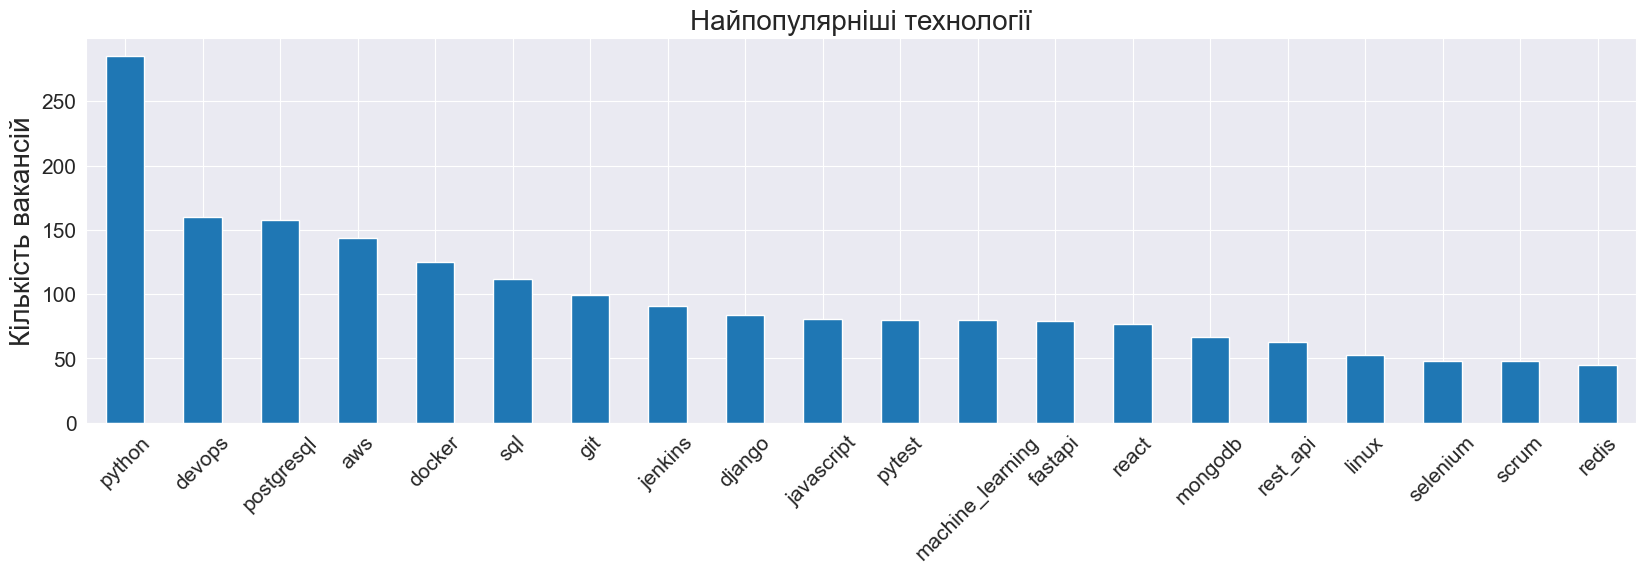

In [61]:
tech_counts.head(20).plot(kind="bar", figsize=(20, 5))

plt.title("Найпопулярніші технології", fontsize=20)
plt.ylabel("Кількість вакансій", fontsize=20)
plt.tick_params(axis="both", labelsize=15)
plt.tick_params(axis="x", rotation=45)

plt.show()


# fontsize=30)
#
#     ax.tick_params(axis="both", labelsize=25)

Сombine all soft skills into one list and count the frequencies of each skill

In [28]:
all_soft_skills = [skills for skills_list in technologies_df["soft_only"] for skills in skills_list]
soft_counts = pd.Series(all_soft_skills).value_counts()
print(soft_counts.dtype)

int64


Building a bar chart for the 10 most popular soft skills

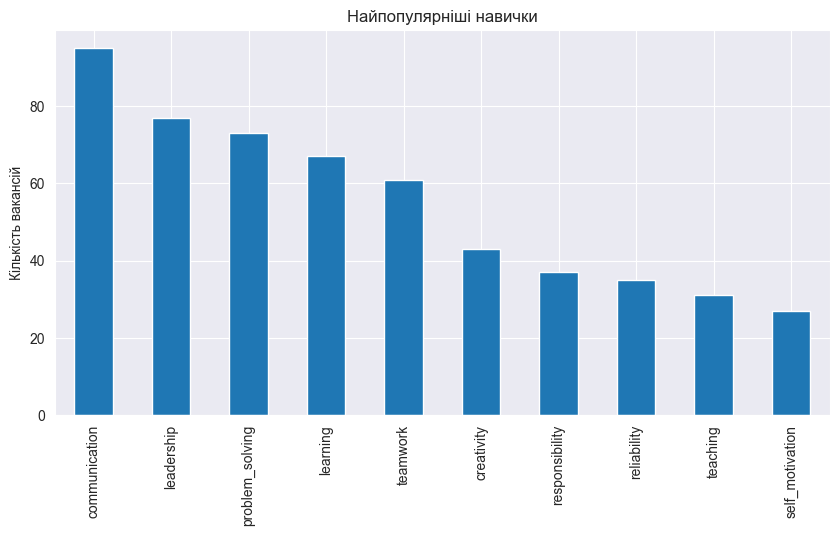

In [29]:
soft_counts.head(10).plot(kind="bar", figsize=(10, 5), title="Найпопулярніші навички")
plt.ylabel("Кількість вакансій")
plt.show()


We delete rows without experience value and without a list of technologies

In [47]:
technologies_df = technologies_df[technologies_df["experience"].notnull()]
technologies_df = technologies_df[technologies_df["tech_only"].notnull()]
technologies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 291
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              183 non-null    object 
 1   title             183 non-null    object 
 2   company           183 non-null    object 
 3   location          183 non-null    object 
 4   salary            43 non-null     object 
 5   experience        183 non-null    float64
 6   link              183 non-null    object 
 7   technologies      183 non-null    object 
 8   pars_tags         183 non-null    object 
 9   tech_only         183 non-null    object 
 10  soft_only         183 non-null    object 
 11  experience_level  183 non-null    object 
dtypes: float64(1), object(11)
memory usage: 18.6+ KB


Сategorization of experience into levels: Junior, Middle, Senior

In [31]:
def categorize_exp(exp):
    if exp <= 2:
        return "Junior (0–2)"
    elif exp <= 5:
        return "Middle (3–5)"
    else:
        return "Senior (6+)"

technologies_df["experience_level"] = technologies_df["experience"].apply(categorize_exp)
technologies_df

,date,title,company,location,salary,experience,link,technologies,pars_tags,tech_only,soft_only,experience_level
1,27 травня 2025,Senior Full-Stack Python Developer,MiaRec,"за кордоном, віддалено",NaN,3.0,https://jobs.dou.ua/companies/miarec/vacancies...,"{""technologies"": [""aws"", ""devops"", ""docker"", ""...","{'technologies': ['aws', 'devops', 'docker', '...","[aws, devops, docker, git, javascript, jenkins...",[],Middle (3–5)
2,5 червня 2025,Middle Python Back End Developer,iSi Technology,віддалено,$1500–4000,8.0,https://jobs.dou.ua/companies/isi-technology/v...,"{""technologies"": [""celery"", ""django"", ""git"", ""...","{'technologies': ['celery', 'django', 'git', '...","[celery, django, git, postgresql, python, reac...",[leadership],Senior (6+)
4,5 травня 2025,Python Tech Lead,PLANEKS,We're a fully remote team thus we do not have ...,NaN,5.0,https://jobs.dou.ua/companies/planeks/vacancie...,"{""technologies"": [""ai_ml"", ""aws"", ""devops"", ""j...","{'technologies': ['ai_ml', 'aws', 'devops', 'j...","[ai_ml, aws, devops, jenkins, kafka, machine_l...","[communication, leadership, learning]",Middle (3–5)
5,5 червня 2025,Senior Python Engineer (EU based),Digis,за кордоном,NaN,2.0,https://jobs.dou.ua/companies/digis/vacancies/...,"{""technologies"": [""aws"", ""django"", ""postgresql...","{'technologies': ['aws', 'django', 'postgresql...","[aws, django, postgresql, python]",[teamwork],Junior (0–2)
7,6 травня 2025,Software Developer — Backend Content,Playtech,Київ,NaN,2.0,https://jobs.dou.ua/companies/playtech/vacanci...,"{""technologies"": [""devops"", ""docker"", ""git"", ""...","{'technologies': ['devops', 'docker', 'git', '...","[devops, docker, git, kafka, kubernetes, linux...","[leadership, learning, self_motivation]",Junior (0–2)
...,...,...,...,...,...,...,...,...,...,...,...,...
286,Вакансія від 2 червня 2025,Python developer,Out of the Box Systems,Дистанційна робота,NaN,1.0,https://www.work.ua/jobs/6708208/,"{""technologies"": [""javascript"", ""nodejs"", ""pos...","{'technologies': ['javascript', 'nodejs', 'pos...","[javascript, nodejs, postgresql, python, sql]",[productivity],Junior (0–2)
288,Вакансія від 14 травня 2025,Python-програміст,Horand LTD,Дистанційна робота,$700-1400,2.0,https://www.work.ua/jobs/6636148/,"{""technologies"": [""django"", ""flask"", ""mongodb""...","{'technologies': ['django', 'flask', 'mongodb'...","[django, flask, mongodb, postgresql, python, s...","[productivity, responsibility, self_motivation]",Junior (0–2)
289,Вакансія від 22 травня 2025,Python-програміст,KEY4,Дистанційна робота,NaN,1.0,https://www.work.ua/jobs/6673054/,"{""technologies"": [""devops"", ""docker"", ""git"", ""...","{'technologies': ['devops', 'docker', 'git', '...","[devops, docker, git, jenkins, json, postgresq...","[honesty, organization, reliability]",Junior (0–2)
290,Вакансія від 2 червня 2025,Python Developer (Backend),Asap Demo LLC,Київ,NaN,1.0,https://www.work.ua/jobs/6628531/,"{""technologies"": [""aws"", ""devops"", ""docker"", ""...","{'technologies': ['aws', 'devops', 'docker', '...","[aws, devops, docker, fastapi, javascript, lin...","[productivity, teamwork]",Junior (0–2)


We count how many times each technology is mentioned at each experience level, and sort by number

In [41]:
experience_level_counts = (
    technologies_df
    .explode("tech_only")
    .groupby("experience_level")["tech_only"]
    .value_counts()
    .sort_values(ascending=False)
)
experience_level_counts

experience_level  tech_only 
Middle (3–5)      python        84
Junior (0–2)      python        78
Middle (3–5)      aws           54
                  devops        54
                  postgresql    51
                                ..
Senior (6+)       rabbitmq       1
                  selenium       1
                  sensors        1
                  sqlite         1
                  testing        1
Name: count, Length: 131, dtype: int64

Plot a technology distribution graph for a given level of experience.

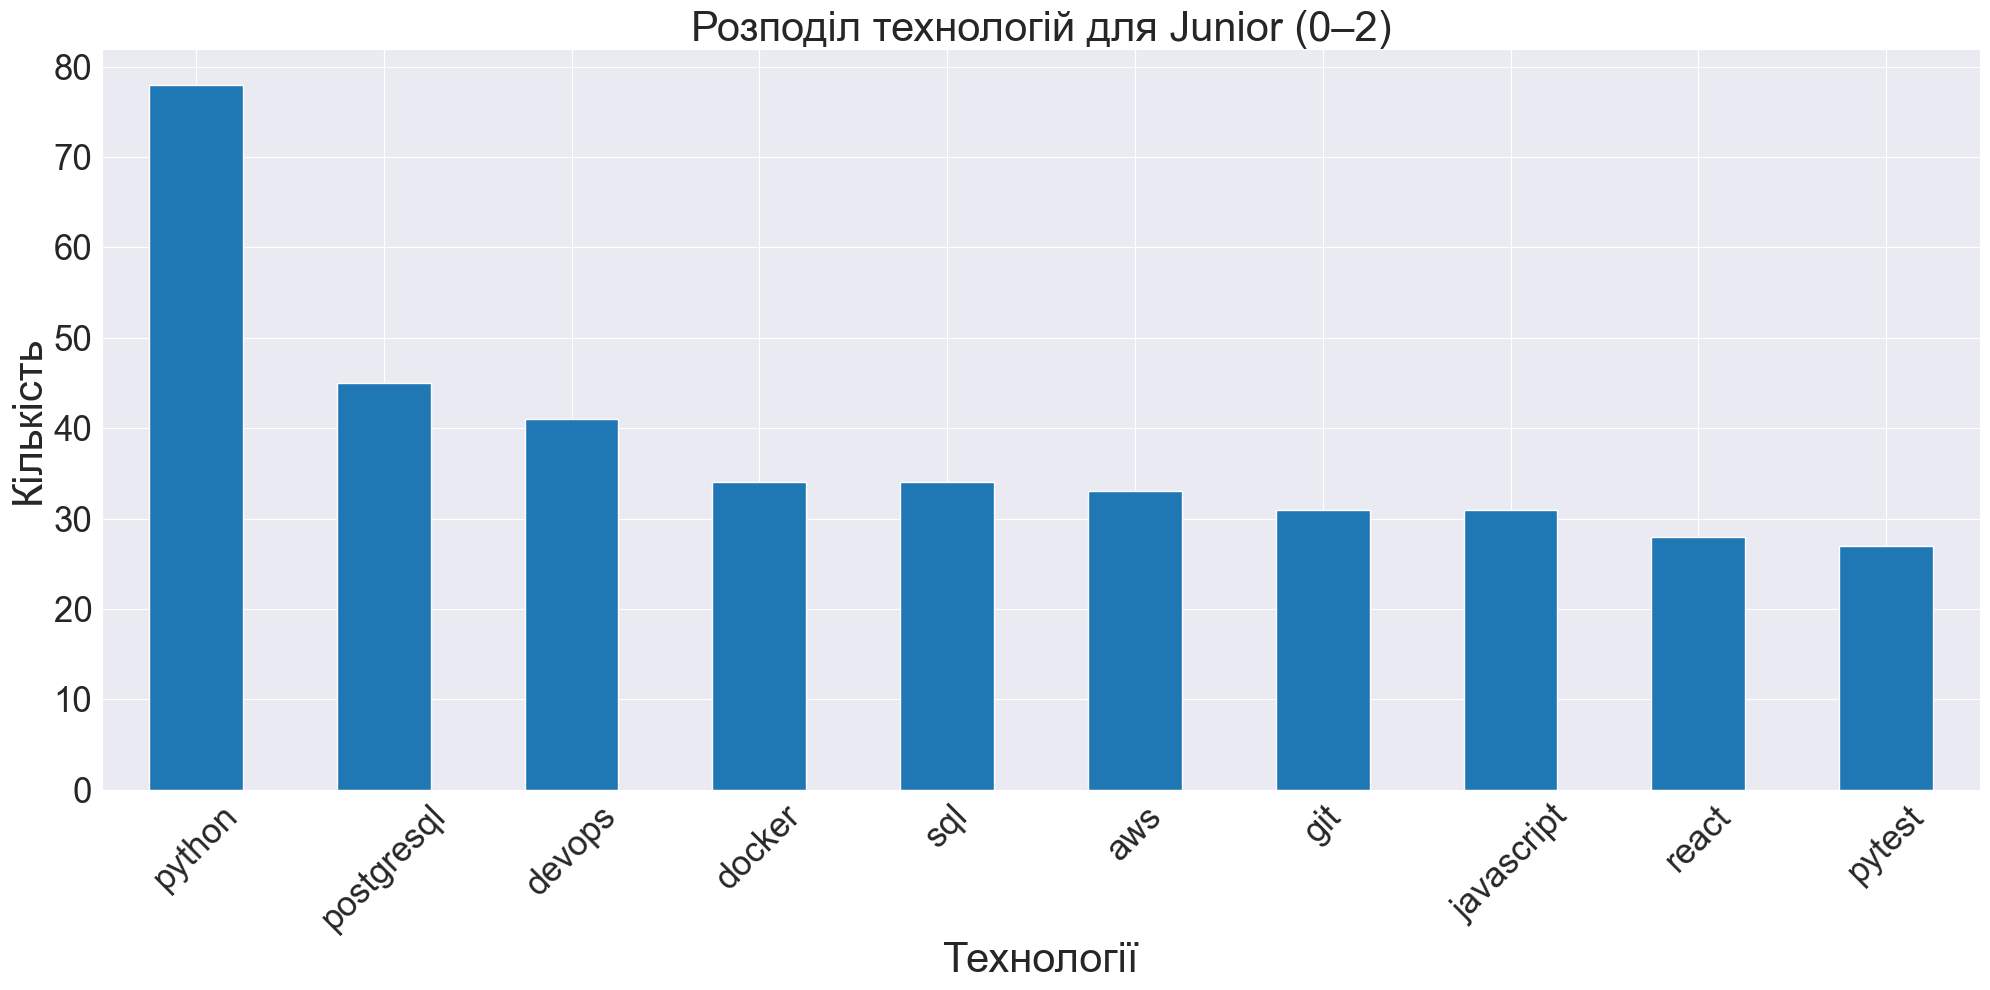

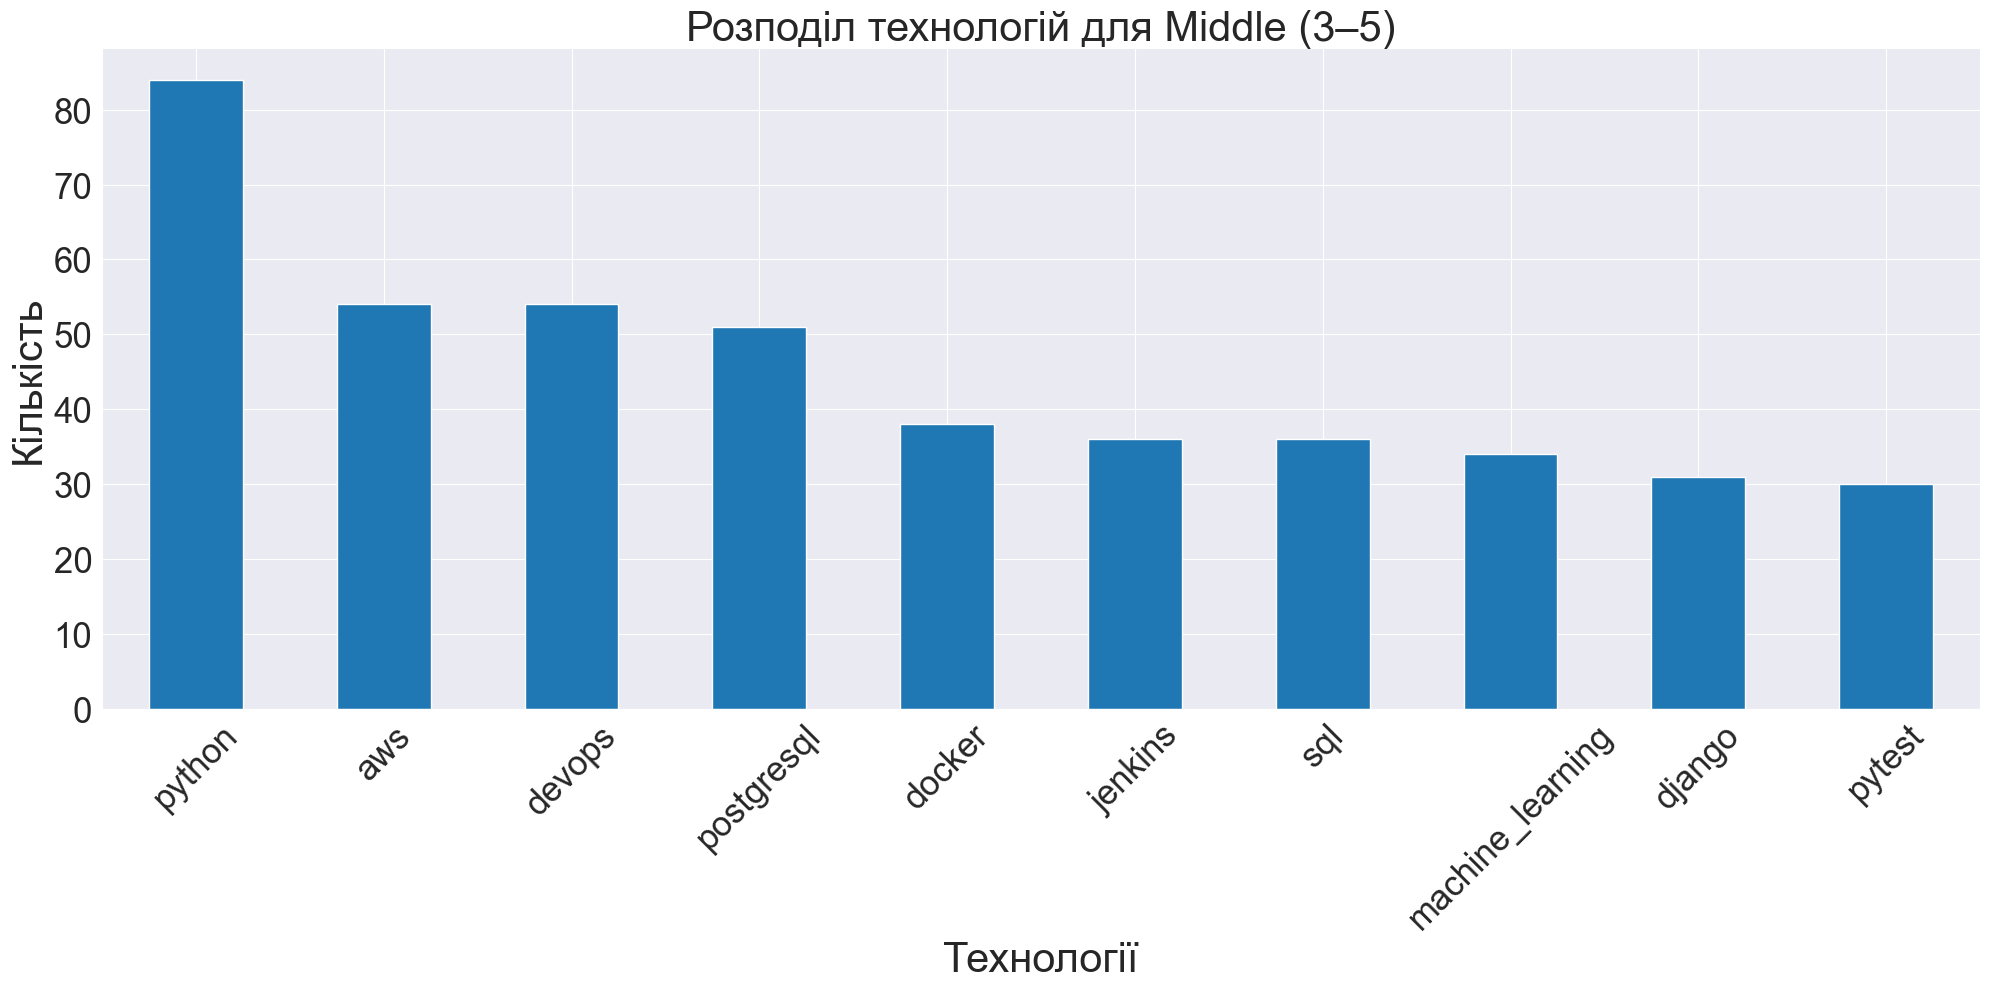

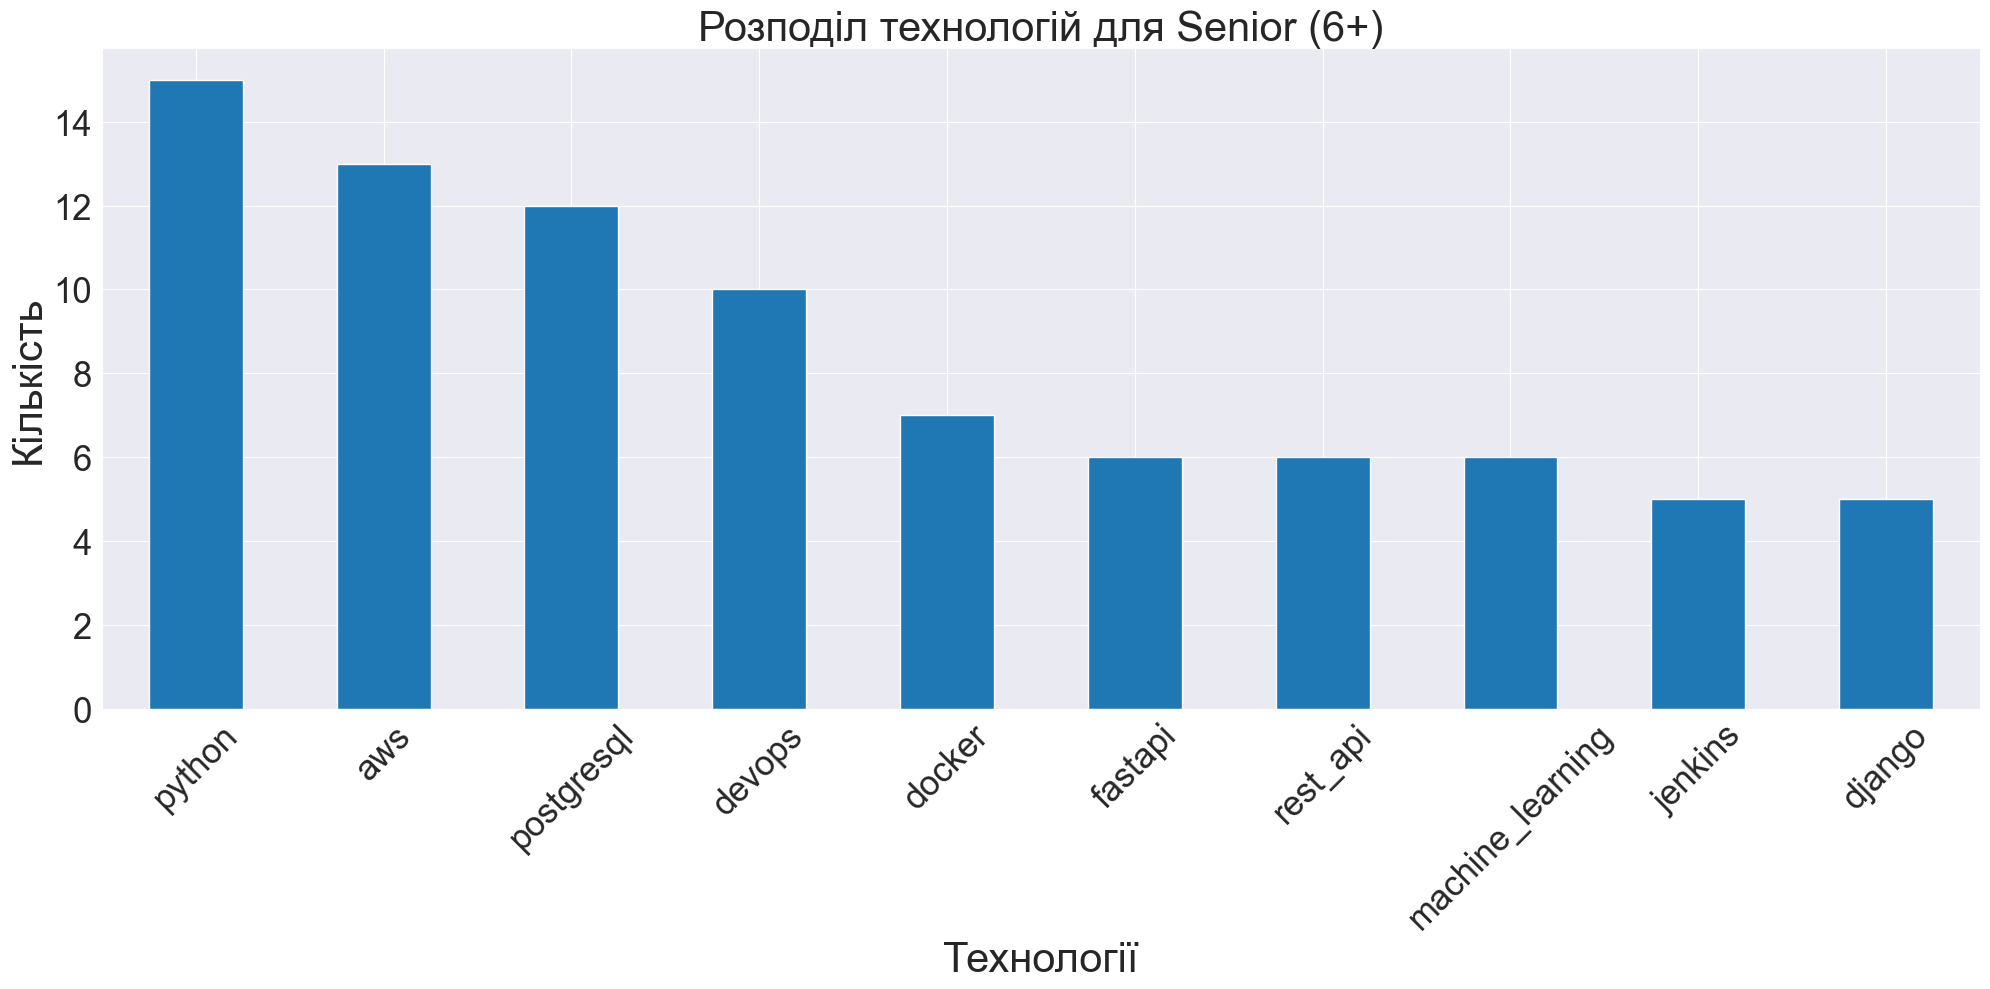

In [48]:
def plot_technology_distribution(data, level, figsize=(20, 10)):

    fig, ax = plt.subplots(figsize=figsize)

    level_data = data.loc[level].nlargest(10)
    level_data.plot(kind='bar', ax=ax)
    ax.set_title(f"Розподіл технологій для {level}", fontsize=30)
    ax.set_xlabel("Технології", fontsize=30)
    ax.set_ylabel("Кількість", fontsize=30)

    ax.tick_params(axis="both", labelsize=25)
    ax.tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()

for level in ["Junior (0–2)", "Middle (3–5)", "Senior (6+)"]:
    plot_technology_distribution(experience_level_counts, level)


In [34]:
experience_distribution = (
    technologies_df["experience_level"]
    .value_counts(normalize=True) * 100
).round(2)

print(experience_distribution)

experience_level
Middle (3–5)    46.99
Junior (0–2)    44.81
Senior (6+)      8.20
Name: proportion, dtype: float64
